# Lab 2: Part A 

Use the Ames Housing dataset from the Colab exercises to answer the following questions.  You can refer to the data documentation here: https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt (Links to an external site.)

1. What were the prices of the most expensive and least expensive houses sold?

2. Make a visualization showing the distribution of house prices.

3. Each house is marked by how flat the property is.  (See: the "Land Contour" variable in the data documentation).  Which is the hilliest Neighborhood?  That is, which one has the highest percent of houses designated "Hillside" (HLS).

4. Suppose we wanted to study sales separately for each neighborhood.   Write a function that takes a neighborhood name as an argument, and creates a new dataframe consisting of only the sales in that neighborhood.  Your function should both return the new data frame and write a csv file with the new data in it.  

5. Use your function to create a dataframe for just the neighborhood of "Crawford".  Make a bar plot showing the land contour counts of houses sold from Crawford.

6.  Use your function to find the median house prices of Bloomington, Crawford, and North Ames. 

7.  Update your function so that it can now take a list of two or more neighborhood names (e.g., ['Crawford', 'NAmes']) and give back only the information for those neighborhoods. 



In [14]:
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_ames = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
df_ames.columns.values

array(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',

1) What were the prices of the most expensive and least expensive houses sold?
The max is $755,000 and the min is $12,789

In [10]:
df_ames["SalePrice"].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

2) Make a visualization showing the distribution of house prices.

<AxesSubplot:title={'center':'House Price Distribution'}, ylabel='Frequency'>

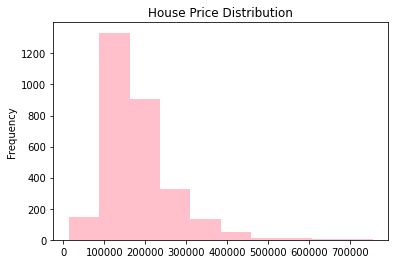

In [17]:
df_ames.SalePrice.plot.hist(color="pink", title="House Price Distribution")

3) Each house is marked by how flat the property is. (See: the "Land Contour" variable in the data documentation). Which is the hilliest Neighborhood? That is, which one has the highest percent of houses designated "Hillside" (HLS).

Crawford neighborhood has the hilliest with 26.67% 

In [52]:
hill_df=df_ames[df_ames["Land Contour"]=="HLS"]
hill_counts=hill_df["Neighborhood"].value_counts()
hill_percents=hill_counts/hill_counts.sum()
print(round(hill_percents.Crawfor*100,2),"%") 

26.67 %


4) Suppose we wanted to study sales separately for each neighborhood. Write a function that takes a neighborhood name as an argument, and creates a new dataframe consisting of only the sales in that neighborhood. Your function should both return the new data frame and write a csv file with the new data in it.

In [100]:
import os
os.chdir("/Users/kate/Desktop/Grad_Materials")
def neighsales(name, df):
    new_df=df[df.Neighborhood==name]
    cols=["Neighborhood","SalePrice"]
    new_df = pd.DataFrame(new_df, columns=cols)
    
    filename = 'Sales_for_' + name + '.csv'
    new_df.to_csv(filename)
    
    return(new_df)


5) Use your function to create a dataframe for just the neighborhood of "Crawford". Make a bar plot showing the land contour counts of houses sold from Crawford.

In [101]:
neighsales('Crawfor', df_ames)

,Neighborhood,SalePrice
293,Crawfor,257500
294,Crawfor,215000
295,Crawfor,266500
296,Crawfor,335000
297,Crawfor,203135
...,...,...
2869,Crawfor,257000
2870,Crawfor,157000
2871,Crawfor,223000
2883,Crawfor,375000


6) Use your function to find the median house prices of Bloomington, Crawford, and North Ames.

In [137]:
bloom=neighsales('Blmngtn', df_ames)
craw=neighsales('Crawfor', df_ames)
north=neighsales('NAmes', df_ames)

print("Bloomington Median Price: $",bloom["SalePrice"].median(),"\t",
      "Crawford Median Price: $",craw["SalePrice"].median(),"\t",
      "North Ames Median Price: $", north["SalePrice"].median())

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
52       53  528228285          120        RL          43.0      3203   Pave   
53       54  528228440          120        RL          43.0      3182   Pave   
468     469  528228290          120        RL          53.0      3684   Pave   
469     470  528228295          120        RL          51.0      3635   Pave   
470     471  528228435          120        RL          43.0      3182   Pave   
471     472  528228450          120        RL          43.0      3182   Pave   
472     473  528228455          120        RL          43.0      3182   Pave   
473     474  528228460          120        RL          43.0      3182   Pave   
1080   1081  528228345          120        RL           NaN      3940   Pave   
1081   1082  528228405          120        RM           NaN      3940   Pave   
1082   1083  528228445          120        RL          43.0      3182   Pave   
1083   1084  528228465           20     

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
293     294  909281080           50        RL          78.0     10452   Pave   
294     295  909426080           90        RL          78.0     15600   Pave   
295     296  909427230           70        RL          66.0      9042   Pave   
296     297  909428280           20        RL         100.0     17500   Pave   
297     298  909452114           80        RL          85.0     19645   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2869   2870  909426060           60        RL          78.0     15600   Pave   
2870   2871  909428110          190        RL          90.0     15750   Pave   
2871   2872  909475020           20        RL           NaN     16381   Pave   
2883   2884  911370430          120        RM          41.0      5748   Pave   
2884   2885  911370530          120        RM          44.0      3842   Pave   

     Alley Lot Shape Land Contour  ... 

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
23       24  527402200           20        RL           NaN     11241   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2630   2631  535477060           60        RL          69.0      7590   Pave   
2631   2632  535478010           85        RL          69.0     10205   Pave   
2632   2633  535478070           20        RL          74.0      7400   Pave   
2633   2634  535478090           20        RL          70.0      7000   Pave   
2634   2635  535478110          190        RL          70.0      7000   Pave   

     Alley Lot Shape Land Contour  ... 

7) Update your function so that it can now take a list of two or more neighborhood names (e.g., ['Crawford', 'NAmes']) and give back only the information for those neighborhoods.

In [140]:
def neighsales(names, df):
    for i in names:
        new_df=df[df['Neighborhood']==i]
        print(new_df)
        
        filename = 'Sales_for' + i + '.csv'
        new_df.to_csv(filename)
    
    return(new_df)
    

In [141]:
names=('Crawfor', 'NAmes')
neighsales(names, df_ames)

      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
293     294  909281080           50        RL          78.0     10452   Pave   
294     295  909426080           90        RL          78.0     15600   Pave   
295     296  909427230           70        RL          66.0      9042   Pave   
296     297  909428280           20        RL         100.0     17500   Pave   
297     298  909452114           80        RL          85.0     19645   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2869   2870  909426060           60        RL          78.0     15600   Pave   
2870   2871  909428110          190        RL          90.0     15750   Pave   
2871   2872  909475020           20        RL           NaN     16381   Pave   
2883   2884  911370430          120        RM          41.0      5748   Pave   
2884   2885  911370530          120        RM          44.0      3842   Pave   

     Alley Lot Shape Land Contour  ... 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
23,24,527402200,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2630,2631,535477060,60,RL,69.0,7590,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,155000
2631,2632,535478010,85,RL,69.0,10205,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134500
2632,2633,535478070,20,RL,74.0,7400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2006,WD,Normal,120000
2633,2634,535478090,20,RL,70.0,7000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,2,2006,WD,Normal,105000


In [118]:
new_df=df_ames[df_ames.Neighborhood==('Crawfor','NAmes')]
new_df.head() 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
